In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('ToyotaCorolla - MLR.csv')
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [ ]:
df.shape

(1436, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


**We can see here that column Fuel_Type is Categorical, so we will convert that into numerical using map function assigning Petrol to 0, Diesel to 1 and CNF to 3.**

In [ ]:
df['Fuel_Type'].unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [ ]:
df['Fuel_Type'] = df['Fuel_Type'].map({'Petrol':0, 'Diesel':1, 'CNG':3 })

In [ ]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170


In [ ]:
df.describe()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,0.143454,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,0.440501,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,0.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,0.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,0.000000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,0.000000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,3.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


**Here is the summary_statistics where we it describes the mean, median and mode of all the columns mentioned in the dataset.**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

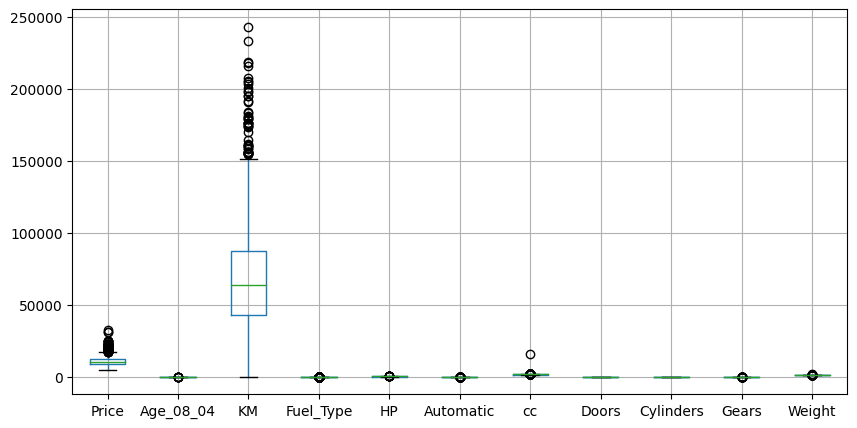

In [ ]:
df.boxplot(figsize=(10,5))

**From the above boxplot we can infer that data in the column KM is dispersed widely.**

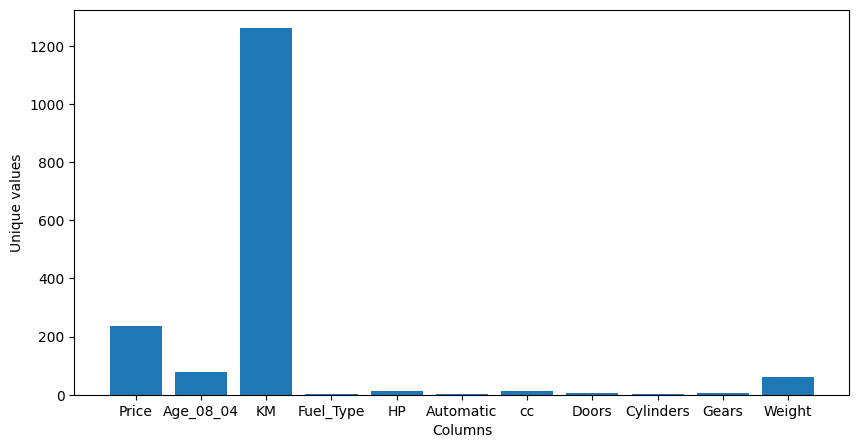

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(df.columns, df.nunique())
plt.xlabel("Columns")
plt.ylabel("Unique values")
plt.show()

In [ ]:
df['Cylinders'].unique()

array([4])

<ipython-input-32-8126b353624c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['KM'])


<Axes: xlabel='KM', ylabel='Density'>

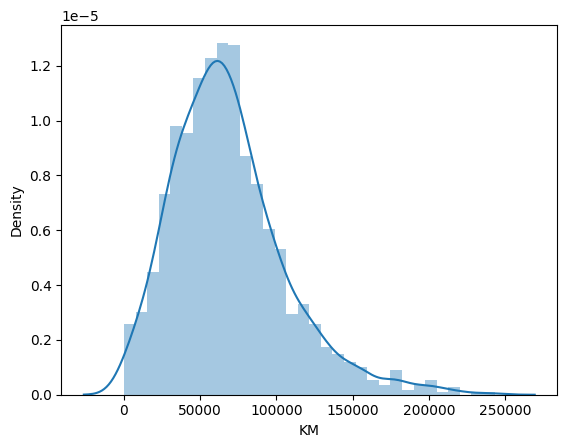

In [ ]:
sns.distplot(df['KM'])

**Feature extration:**

We are extracting the relevent features before splitting the data. Since we are predicting the price of the Toyota corolla, we are considering Price column as the target variable. Rest others as the independent variables.

In [ ]:
x = df.drop('Price', axis=1)
y = df['Price']

In [ ]:
x.head()

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,23,46986,1,90,0,2000,3,4,5,1165
1,23,72937,1,90,0,2000,3,4,5,1165
2,24,41711,1,90,0,2000,3,4,5,1165
3,26,48000,1,90,0,2000,3,4,5,1165
4,30,38500,1,90,0,2000,3,4,5,1170


In [ ]:
y.head()

,Price
0,13500
1,13750
2,13950
3,14950
4,13750


**Splitting the data into training and testing sets, 80% for training and 20% for testing.**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1148, 10), (288, 10), (1148,), (288,))

**1.Building linear Regression model without scaling.**

In [ ]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

In [ ]:
model1.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred1 = model1.predict(x_test)
y_pred1

array([11204.87588799,  8957.38291205,  9441.7399731 ,  8958.86661522,
       10097.82995604,  7880.40413373,  8733.49056647,  8280.34465783,
       14112.21277913, 13141.42711958,  9464.14338945,  9335.98566863,
       12965.67922638, 13002.03470024,  9778.78471468,  8247.53826664,
       12243.56754454, 17534.97127091,  7403.15020051,  9169.53308461,
       12742.22255646, 17797.55862141,  7889.51573007, 10428.89343074,
        7469.55542417, 16002.49568962,  9993.0101227 ,  7350.89800902,
       15605.03787958, 14520.0279528 ,  8154.63260792,  9781.36860624,
        8517.14162275, 10119.75591136, 10278.66865144,  8046.21963791,
        8855.40374605,  9985.25601911, 16313.55065862,  9575.1871667 ,
        9865.48896557,  9530.60324277,  7881.11192333,  5518.51330687,
        6785.97056444, 17139.47346106,  9454.24355469, 10704.36951543,
        8708.17431613, 13488.34903514, 13010.01292349,  6315.57046952,
       14872.43141811, 16238.20243991,  6045.97638669,  7758.30027875,
      

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred1)

0.8465922388504851

We got r2_score of 0.84, that means 84% of variance in target variable (Price) can be explained by the features in this linear regression model.

In [ ]:
coefficients1 = pd.DataFrame({'Feature': x_train.columns, 'Coefficient': model1.coef_})
print(coefficients1)

     Feature   Coefficient
0  Age_08_04 -1.215790e+02
1         KM -1.755554e-02
2  Fuel_Type -5.491097e+02
3         HP  2.387534e+01
4  Automatic  2.953041e+02
5         cc -9.399222e-02
6      Doors -2.230766e+01
7  Cylinders -3.410605e-13
8      Gears  5.339741e+02
9     Weight  2.220902e+01


We can see that **Gears** has the **largest positive** impact on the price. A one-unit increase in Greas is associated with an increase of appox 533.97 in price. And **Fuel_Type** has the **largest negative** impact on the price.

**2.Building the linear regression model with scaling the data.**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
model2 = LinearRegression()
model2.fit(x_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred2 = model2.predict(x_test_scaled)

In [ ]:
r2_score(y_pred2, y_test)

0.8258322780857767

We got r2_score of 0.82, that means 82% of variance in target variable (Price) can be explained by the features in this linear regression model.

In [ ]:
coefficients2 = pd.DataFrame({'Feature': x_train.columns, 'Coefficient': model2.coef_})
print(coefficients2)

     Feature   Coefficient
0  Age_08_04 -2.281341e+03
1         KM -6.615520e+02
2  Fuel_Type -2.585235e+02
3         HP  3.543168e+02
4  Automatic  6.824936e+01
5         cc -4.382660e+01
6      Doors -2.125603e+01
7  Cylinders  4.121148e-13
8      Gears  1.058464e+02
9     Weight  1.129816e+03


Here we the coefficients of the linear regression model built with scaled data.

Age_08_04 has the largest negative coefficient which means that it has biggest negative impact on the price. And Weight has the biggest positive impact on the price.

**3.Building linear regression model with polynomial features**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)

In [ ]:
x_train_poly = poly.fit_transform(x_train_scaled)
x_test_poly = poly.transform(x_test_scaled)

In [ ]:
model3 = LinearRegression()
model3.fit(x_train_poly, y_train)

LinearRegression()

In [ ]:
y_pred3 = model3.predict(x_test_poly)

In [ ]:
r2_score(y_pred3, y_test)

0.8178736645165916

We got r2_score of 0.81, that means 81% of variance in target variable (Price) can be explained by the features in this linear regression model.

**Applying Ridge and Lasso regressions.**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [ ]:
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(x_train_scaled, y_train)

Ridge(alpha=0.1)

In [ ]:
y_pred_ridge = ridge_model.predict(x_test_scaled)

In [ ]:
print("Ridge:",r2_score(y_pred_ridge, y_test))

Ridge: 0.8258164707092464


In [ ]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train_scaled, y_train)

Lasso(alpha=0.1)

In [ ]:
y_pred_lasso = lasso_model.predict(x_test_scaled)

In [ ]:
print("Lasso:", r2_score(y_pred_lasso, y_test))

Lasso: 0.8258214248932019


We got r2_score of 0.82, that means 82% of variance in target variable (Price) can be explained by the features for the both Ridge and Lasso Regressions.

**1.Normalization and Standardization**

**Normalization:** It is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

**Standardization:** This is also a scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero, and the resultant distribution has a unit standard deviation.


Both are Feature Scaling which is crucial step in machine learning to build some effective models. By using help of these procedures we can make our model more precise more useful and efficient. It also helps in managing outliers present in data. This techniques gives an important glance at our models and help train them effectively and precisely by learning from the data.



**2.Techniques to address Multicolinearity in multiple linear regression**

To address multicollinearity, techniques such as **regularization** or **feature selection** can be applied to select a subset of independent variables that are not highly correlated with each other.

There are some other techniques to address the multicolinearity:

1.Using **Variance Inflation factor**: Helps to remove one of the highly correlated variables to reduce multicollinearity.

2.**Lasso Regression**: It helps by shrinking coefficients to zero, effectively performing variable selection. This can reduce multicollinearity by removing redundant variables.

3.**Ridge Regression**: It is a regularization technique that adds a penalty to large coefficients, effectively reducing the impact of multicollinearity. It doesn't remove multicollinearity but makes the model less sensitive to it by stabilizing the coefficients.
